# NASDAQ 100: Performance 2020 vs. current drawdown

Drawdown charts for NASDAQ 100 stocks.


In [1]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

nasdaq = ["AAPL", "ADBE", "ADI", "ADP", "ADSK", "AEP", "ALGN", "ALXN", "AMAT", "AMD", "AMGN", "AMZN", "ANSS", "ASML", "ATVI", "AVGO", "BIDU",
          "BIIB", "BKNG", "CDNS", "CDW", "CHKP", "CHTR", "COST", "CPRT", "CSCO", "CSX", "CTAS", "DLTR", "DOCU", "DXCM", "EA", "EBAY", "EXC",
          "FAST", "FB", "FISV", "FOX", "FOXA", "GOOG", "GOOGL", "IDXX", "ILMN", "INCY", "INTC", "INTU", "ISRG", "KDP", "KHC", "KLAC", "LRCX",
          "LULU", "MAR", "MCHP", "MDLZ", "MELI", "MNST", "MRNA", "MRVL", "MSFT", "MTCH", "MU", "MXIM", "NFLX", "NTES", "NVDA", "NXPI", "OKTA",
          "ORLY", "PAYX", "PCAR", "PDD", "PEP", "PTON", "PYPL", "QCOM", "REGN", "ROST", "SBUX", "SGEN", "SIRI", "SNPS", "SPLK", "SWKS", "TCOM",
          "TEAM", "TMUS", "TSLA", "TXN", "VRSK", "VRSN", "VRTX", "WBA", "WDAY", "XEL", "XLNX", "ZM"]

start_date = '2020-01-02'
end_date = datetime.today()

nasdaq_data = data.DataReader(nasdaq, 'yahoo', start_date, end_date)


In [2]:
adj_closes = nasdaq_data["Adj Close"]
data_2020 = adj_closes[adj_closes.index.isin(["2020-01-02", "2020-12-31"])]

performance_2020 = data_2020.pct_change().tail(1).max() * 100


In [3]:
stock_names = list()
drawdowns = list()
for symbol in nasdaq:
    profit = adj_closes[symbol].diff()
    cumulative = profit.cumsum().round(2)
    high_value = cumulative.cummax()
    drawdown = cumulative - high_value

    last_value = (adj_closes[symbol].tail(1) / (adj_closes[symbol].tail(1) - drawdown.tail(1)) - 1) * 100

    stock_names.append(symbol)
    drawdowns.append(last_value)

current_drawdown_per_stock = pd.DataFrame.from_dict({'Stock': stock_names, 'MaxDrawDown': drawdowns})

Text(-140, -55, 'Data source:\nYahoo Finance')

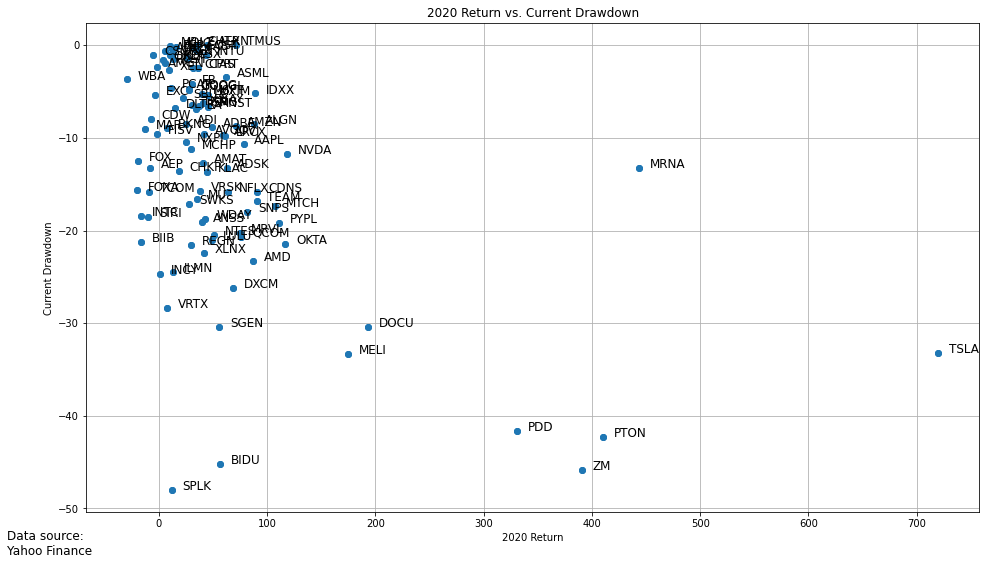

In [4]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.scatter(performance_2020, current_drawdown_per_stock["MaxDrawDown"])
plt.plot(performance_2020, current_drawdown_per_stock["MaxDrawDown"], 'o')

ax.set_xlabel("2020 Return")
ax.set_ylabel("Current Drawdown")
ax.set_title("2020 Return vs. Current Drawdown")
ax.grid('on')

for txt in current_drawdown_per_stock["Stock"]:
    ax.text(performance_2020[txt] + 10, current_drawdown_per_stock[current_drawdown_per_stock["Stock"] == txt]["MaxDrawDown"], txt,
            fontsize=12)
ax.text(-140, -55, "Data source:\nYahoo Finance",
        fontsize=12)


# NASDAQ 100: Underwater chart

Drawdown charts for NASDAQ 100 stocks.


In [10]:
from IPython import display
from ipywidgets import widgets
import matplotlib.pyplot as plt

underwater_out = widgets.Output()

underwater_widget = widgets.SelectMultiple(
    options=list(adj_closes),
    value=(),
    description='Ticker:',
    disabled=False,
)


def underwater_plot(tickr):
    with underwater_out:
        underwater_out.clear_output()

        underwater_fig = plt.figure(figsize=(20, 20))
        underwater_ax1 = underwater_fig.add_axes([0.1, 0.1, 0.8, 0.8])

        for i in tickr:
            profit = (adj_closes[i].diff())
            cumulative = profit.cumsum().round(2)
            high_value = cumulative.cummax()

            drawdown = cumulative - high_value

            underwater = (adj_closes[i] / (adj_closes[i] - drawdown) - 1) * 100

            underwater.plot(label=i, linewidth=1)

            underwater_ax1.fill_between(adj_closes.index, underwater, alpha=0.4)
        underwater_ax1.legend()
        axes = plt.gca()
        axes.set_ylim([-100, 0])
        underwater_ax1.set_xlabel("Date")
        underwater_ax1.set_ylabel("Drawdown")
        underwater_ax1.grid('on')
        plt.show()


def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        underwater_plot(change['new'])


underwater_widget.observe(on_change)
display.display(underwater_out)

with underwater_out:
    display.display(underwater_widget)

Output()